# EDA Project - Northwind

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
from sklearn import datasets
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

engine = create_engine("sqlite:///Northwind.sqlite")
all_tables = engine.table_names()
all_tables

<ipython-input-1-cc71b64c8549>:11: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'OrderDetail',
 'Orderr',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

# Loading data

In [2]:
df=pd.read_sql( 'SELECT * FROM Orderr; ',engine)
df

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,16.75,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,22.25,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,25.00,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,20.25,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,36.25,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16813,27061,FOLKO,5,2013-06-29 21:05:55,2013-08-02 04:10:53,2013-07-02 16:05:51,3,307.25,Familia Arquibaldo,"Rua Orós, 92",Sao Paulo,South America,05442-030,Brazil
16814,27062,FRANK,2,2014-01-19 12:27:11,2014-01-24 15:15:31,2014-01-27 02:14:31,2,550.50,Bon app',"12, rue des Bouchers",Marseille,Western Europe,13008,France
16815,27063,ALFKI,5,2014-10-15 09:51:09,2014-11-11 14:31:37,2014-10-16 06:26:55,1,328.50,Furia Bacalhau e Frutos do Mar,Jardim das rosas n. 32,Lisboa,Southern Europe,1675,Portugal
16816,27064,TRADH,8,2013-02-07 02:06:05,2013-03-14 09:43:16,2013-02-24 10:15:47,3,357.00,Wilman Kala,Keskuskatu 45,Helsinki,Scandinavia,21240,Finland


# Cleating Data

In [3]:
df.isna()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16813,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16814,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16815,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16816,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.dtypes

Id                  int64
CustomerId         object
EmployeeId          int64
OrderDate          object
RequiredDate       object
ShippedDate        object
ShipVia             int64
Freight           float64
ShipName           object
ShipAddress        object
ShipCity           object
ShipRegion         object
ShipPostalCode     object
ShipCountry        object
dtype: object

# Queries

In [5]:
df=pd.read_sql('SELECT ShipCity,count( ShipCity) as Order_City ,sum(freight) as Freight ,RequiredDate as Date FROM Orderr  GROUP BY ShipCity ORDER BY count( ShipCity) DESC;',engine)
df.head()

# Freight cost per city

,ShipCity,Order_City,Freight,Date
0,London,952,239573.25,2012-09-23
1,México D.F.,917,233108.25,2012-08-15
2,Sao Paulo,748,182533.75,2012-09-24
3,Buenos Aires,576,140443.25,2013-02-06
4,Rio de Janeiro,555,128596.25,2012-08-05


In [6]:
dfd=pd.read_sql('SELECT r.ShipCity ,count( r.ShipCity) as Order_City,( d.Quantity *d.UnitPrice)as Money ,r.RequiredDate as Date   FROM Orderr r JOIN OrderDetail d ON r.Id=d.OrderId GROUP BY ShipCity ORDER BY Money DESC,Order_City DESC;',engine)
dfd.head(10)
# income amount for each city 

,ShipCity,Order_City,Money,Date
0,Charleroi,7101,2592.0,2012-08-06
1,Montréal,6910,2000.0,2012-11-28
2,Anchorage,5512,1250.0,2012-10-11
3,Caracas,5961,990.0,2012-08-27
4,Strasbourg,7413,936.0,2012-08-22
5,San Cristóbal,6851,877.5,2012-08-13
6,Graz,6410,760.0,2012-08-14
7,München,7886,735.0,2012-08-26
8,Leipzig,7460,728.0,2012-09-06
9,Berlin,15057,684.0,2013-09-22


In [7]:
dfd['Date'] = pd.to_datetime(dfd['Date'])

In [8]:
start_date = '2012-01-01'
end_date = '2013-01-01'

In [9]:
mask = (dfd['Date'] > start_date) & (dfd['Date'] <= end_date)

#mask = determine the date for one year 2012 

In [10]:
City_Date = dfd.loc[mask]
City_Date.head(10)

,ShipCity,Order_City,Money,Date
0,Charleroi,7101,2592.0,2012-08-06
1,Montréal,6910,2000.0,2012-11-28
2,Anchorage,5512,1250.0,2012-10-11
3,Caracas,5961,990.0,2012-08-27
4,Strasbourg,7413,936.0,2012-08-22
5,San Cristóbal,6851,877.5,2012-08-13
6,Graz,6410,760.0,2012-08-14
7,München,7886,735.0,2012-08-26
8,Leipzig,7460,728.0,2012-09-06
10,Cork,6688,608.0,2012-10-03


In [11]:
df1=pd.read_sql('SELECT ProductId,count(Quantity) as Orders FROM OrderDetail GROUP BY ProductId ORDER BY Orders DESC;',engine)
f=df1.sort_values('Orders',ascending=False)[:10]
f


,ProductId,Orders
0,29,8192
1,51,8179
2,71,8171
3,34,8166
4,74,8160
5,16,8156
6,3,8155
7,52,8150
8,2,8147
9,75,8144


# Visualization

In [12]:
import seaborn as sns

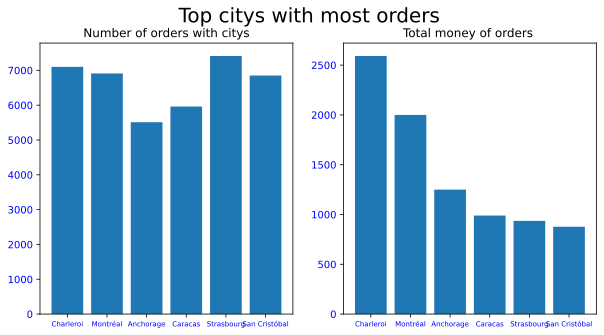

In [13]:
plt.figure(figsize=[10,5])

plt.suptitle('Top citys with most orders',fontsize=20)

plt.subplot(1,2,1)
plt.bar(City_Date['ShipCity'][0:6],City_Date['Order_City'][0:6])
plt.title('Number of orders with citys')
plt.xticks(fontsize=7,color='b');
plt.yticks(fontsize=10,color='b');

plt.subplot(1,2,2)
plt.bar(City_Date['ShipCity'][0:6],City_Date['Money'][0:6])
plt.title('Total money of orders ')
plt.xticks(fontsize=7,color='b');
plt.yticks(fontsize=10,color='b');

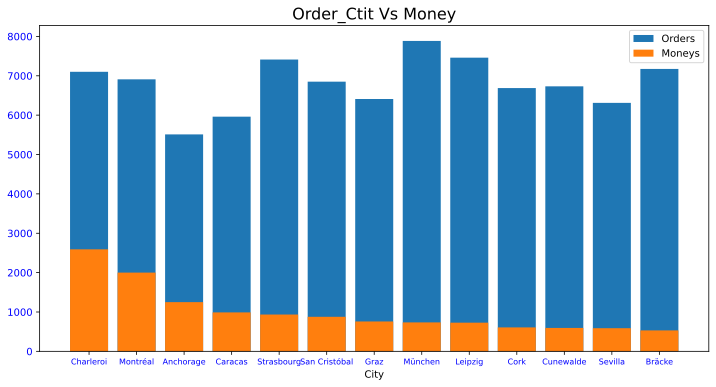

<Figure size 432x288 with 0 Axes>

In [14]:
x=City_Date['ShipCity'][:13]
y=City_Date['Order_City'][:13]
z=City_Date['Money'][:13]

plt.figure(figsize=(12,6))
plt.bar(x,y,label="Orders")
plt.bar(x,z,label="Moneys")
plt.xlabel("City")
plt.title("Order_Ctit Vs Money",fontsize = 16)
plt.xticks(fontsize=8,color='b');
plt.yticks(fontsize=10,color='b');
plt.legend()
plt.show()
plt.savefig('orderMoney')